# Random Forest Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [3]:
data = pd.read_csv("Data\Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Preprocessing
### Splitting x and y

In [4]:
x = data.iloc[:, 2:4].values
y = data.iloc[:, 4].values

### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Creating the model

In [6]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10, criterion="gini", random_state=0)

In [7]:
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

### Predition

In [8]:
y_pred_test = classifier.predict(x_test)
y_pred_train = classifier.predict(x_train)

### Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test)

array([[56,  2],
       [ 4, 18]], dtype=int64)

In [10]:
confusion_matrix(y_train, y_pred_train)

array([[198,   1],
       [  3, 118]], dtype=int64)

In [11]:
print(f"The Accuracy of Training data {classifier.score(x_train, y_train)}")
print(f"The Accuracy of Test data {classifier.score(x_test, y_test)}")

The Accuracy of Training data 0.9875
The Accuracy of Test data 0.925


It seems our model is overfitting

## ROC and AUC

In [12]:
from sklearn.metrics import roc_auc_score, roc_curve

In [13]:
y_pred_proba = classifier.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

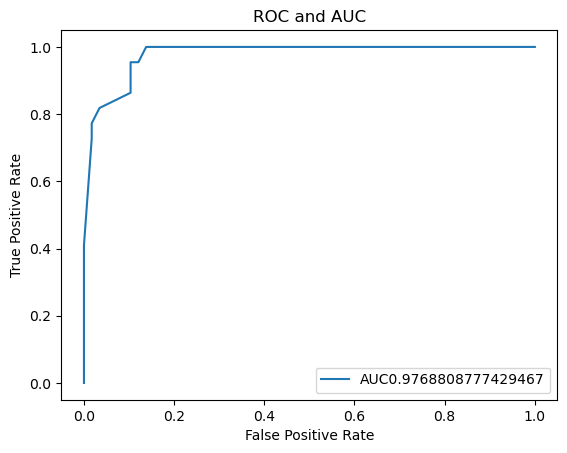

In [14]:
plt.plot(fpr, tpr, label="AUC" + str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.title("ROC and AUC")
plt.show()